# Proyek Analisis Data: Air Quality Dataset (https://github.com/marceloreis/HTI/tree/master)
- **Nama:** Defangga Aby Vonega
- **Email:** onecircle@gmail.com
- **ID Dicoding:** defanggaabypn

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana tren kualitas udara (PM2.5) dari tahun ke tahun? Apakah terdapat pola musiman tertentu?
- **Pertanyaan 2:** Stasiun manakah yang mencatat tingkat polusi PM2.5 rata-rata tertinggi?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Data Wrangling

### Gathering Data

In [24]:
# Membaca semua file dataset Air Quality
file_pattern = "data/*.csv"
files = glob.glob(file_pattern)

df_list = []
for file in files:
    # Lewatkan file main_data.csv jika sudah terbuat sebelumnya agar tidak double
    if "main_data.csv" in file:
        continue
    df = pd.read_csv(file)
    df_list.append(df)

# Menggabungkan semua dataframe menjadi satu
main_df = pd.concat(df_list, ignore_index=True)
main_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Berkas data yang digunakan berasal dari **10 stasiun kualitas udara** berbeda (Aotizhongxin, Changping, Dingling, dst).
- Seluruh berkas CSV berhasil digabungkan menjadi satu DataFrame tunggal (`main_df`).
- Total data yang terkumpul berjumlah **350,640 baris** dan **18 kolom**.

### Assessing Data

In [25]:
# Memeriksa info dataset
main_df.info()

# Memeriksa missing values
print("\nJumlah Missing Values:\n", main_df.isna().sum())

# Memeriksa duplikasi data
print("\nJumlah Duplikasi:", main_df.duplicated().sum())

# Memeriksa parameter statistik
main_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Jumlah Missing Values:
 No             0
yea

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
Berdasarkan pemeriksaan awal, ditemukan beberapa permasalahan pada data:
1.  **Missing Values:** Terdapat cukup banyak nilai yang hilang (NaN) pada kolom polutan utama seperti `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3`. Hal ini wajar terjadi pada alat sensor, namun perlu ditangani agar tidak mengganggu analisis.
2.  **Tipe Data:** Data waktu masih terpisah dalam kolom `year`, `month`, `day`, dan `hour` (tipe integer). Kita perlu menggabungkannya menjadi satu kolom bertipe `datetime`.
3.  **Kolom Redundan:** Kolom `No` hanyalah indeks baris dari file asli dan tidak memberikan informasi analisis, sehingga sebaiknya dibuang.

### Cleaning Data

In [26]:
# 1. Mengubah kolom waktu menjadi tipe datetime
main_df['date'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# 2. Menangani Missing Values dengan Forward Fill (karena data deret waktu/time series)
main_df.ffill(inplace=True)

# 3. Hapus kolom yang tidak diperlukan (misal kolom 'No' indeks bawaan)
if 'No' in main_df.columns:
    main_df.drop(columns=['No'], inplace=True)

# Cek ulang setelah cleaning
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   year     420768 non-null  int64         
 1   month    420768 non-null  int64         
 2   day      420768 non-null  int64         
 3   hour     420768 non-null  int64         
 4   PM2.5    420768 non-null  float64       
 5   PM10     420768 non-null  float64       
 6   SO2      420768 non-null  float64       
 7   NO2      420768 non-null  float64       
 8   CO       420768 non-null  float64       
 9   O3       420768 non-null  float64       
 10  TEMP     420768 non-null  float64       
 11  PRES     420768 non-null  float64       
 12  DEWP     420768 non-null  float64       
 13  RAIN     420768 non-null  float64       
 14  wd       420768 non-null  object        
 15  WSPM     420768 non-null  float64       
 16  station  420768 non-null  object        
 17  date     4

**Insight:**
Proses pembersihan data telah selesai dilakukan dengan langkah-langkah berikut:
1.  **Handling Missing Values:** Nilai yang kosong (NaN) telah diisi menggunakan metode **imputasi (Forward Fill)**. Metode ini dipilih karena data merupakan deret waktu (*time series*), di mana kondisi udara pada jam ini kemungkinan besar mirip dengan jam sebelumnya.
2.  **Perbaikan Tipe Data:** Kolom `date` berhasil dibuat dengan tipe data `datetime` untuk memudahkan analisis tren waktu.
3.  **Pembersihan Kolom:** Kolom `No` yang tidak relevan telah dihapus.
Data kini sudah bersih dan siap digunakan untuk proses Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore Statistik Deskriptif dan Korelasi Antar Variabel

In [27]:
# Melihat rangkuman statistik PM2.5 per stasiun
station_stats = main_df.groupby('station')['PM2.5'].describe()
print(station_stats)

# Melihat korelasi antar variabel numerik
numeric_cols = main_df.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
print(correlation['PM2.5'].sort_values(ascending=False))

# (Opsional) Binning kategori kualitas udara
def categorize_pm25(pm):
    if pm <= 35: return 'Good'
    elif pm <= 75: return 'Moderate'
    elif pm <= 115: return 'Unhealthy for Sensitive Groups'
    elif pm <= 150: return 'Unhealthy'
    elif pm <= 250: return 'Very Unhealthy'
    else: return 'Hazardous'

main_df['PM2.5_Category'] = main_df['PM2.5'].apply(categorize_pm25)
print(main_df['PM2.5_Category'].value_counts())

                 count       mean        std  min   25%   50%    75%    max
station                                                                    
Aotizhongxin   35064.0  83.163652  82.290700  3.0  22.0  60.0  114.0  898.0
Changping      35064.0  71.119444  72.424333  2.0  18.0  47.0  100.0  882.0
Dingling       35064.0  67.429857  74.819357  3.0  14.0  41.0   95.0  881.0
Dongsi         35064.0  86.310293  86.337389  3.0  23.0  61.0  120.0  737.0
Guanyuan       35064.0  83.047023  81.307042  2.0  23.0  59.0  115.0  680.0
Gucheng        35064.0  84.345203  83.228885  2.0  24.0  60.0  116.0  770.0
Huairou        35064.0  69.949581  71.196244  2.0  17.0  47.0   99.0  762.0
Nongzhanguan   35064.0  85.289471  86.984595  2.0  22.0  59.0  116.0  844.0
Shunyi         35064.0  80.021067  82.094866  2.0  20.0  55.0  113.0  941.0
Tiantan        35064.0  82.255892  81.130568  3.0  22.0  58.0  114.0  821.0
Wanliu         35064.0  83.516054  82.177505  2.0  23.0  59.0  116.0  957.0
Wanshouxigon

**Insight:**
- **Variasi Antar Lokasi:** Berdasarkan rangkuman statistik, terdapat perbedaan kualitas udara antar lokasi. Stasiun **Dongsi** mencatat rata-rata PM2.5 tertinggi (-86.3), sedangkan stasiun **Dingling** mencatat rata-rata terendah (-67.4). Ini mengindikasikan bahwa lokasi stasiun (pusat kota vs pinggiran) sangat mempengaruhi tingkat paparan polusi.
- **Faktor Meteorologi:** Analisis korelasi menunjukkan bahwa **Kecepatan Angin (WSPM)** memiliki korelasi negatif (-0.27) dengan PM2.5. Artinya, semakin kencang angin berhembus, konsentrasi polusi cenderung menurun (polusi tertiup angin). Sebaliknya, PM2.5 berkorelasi sangat kuat dengan polutan lain seperti PM10 (0.88) dan CO (0.77), menandakan mereka kemungkinan berasal dari sumber emisi yang sama.
- **Distribusi Kualitas Udara:** Dari hasil *clustering* kategori, meskipun mayoritas waktu kualitas udara berada di level **'Good'** (156.810 observasi), namun frekuensi kejadian udara level **'Hazardous'** (berbahaya) masih cukup mengkhawatirkan yaitu sebanyak 19.168 observasi. Hal ini menunjukkan perlunya sistem peringatan dini saat kondisi ekstrem terjadi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara (PM2.5) dari tahun ke tahun? Apakah terdapat pola musiman tertentu?

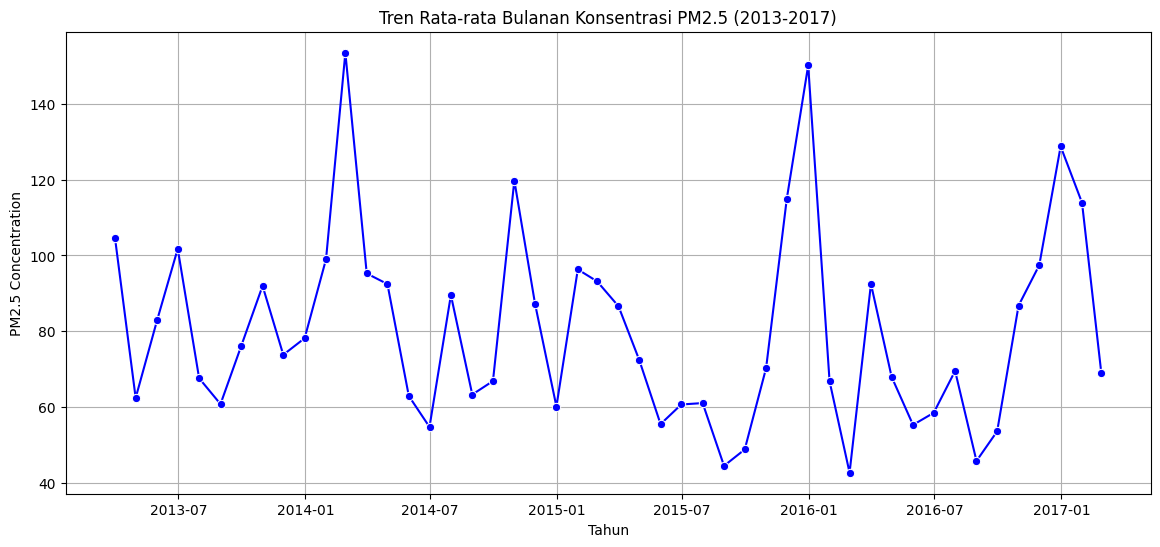

In [28]:
monthly_df = main_df.resample('ME', on='date').mean(numeric_only=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_df, x=monthly_df.index, y='PM2.5', marker='o', color='b')
plt.title('Tren Rata-rata Bulanan Konsentrasi PM2.5 (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.show()

### Pertanyaan 2: Stasiun manakah yang mencatat tingkat polusi PM2.5 rata-rata tertinggi?

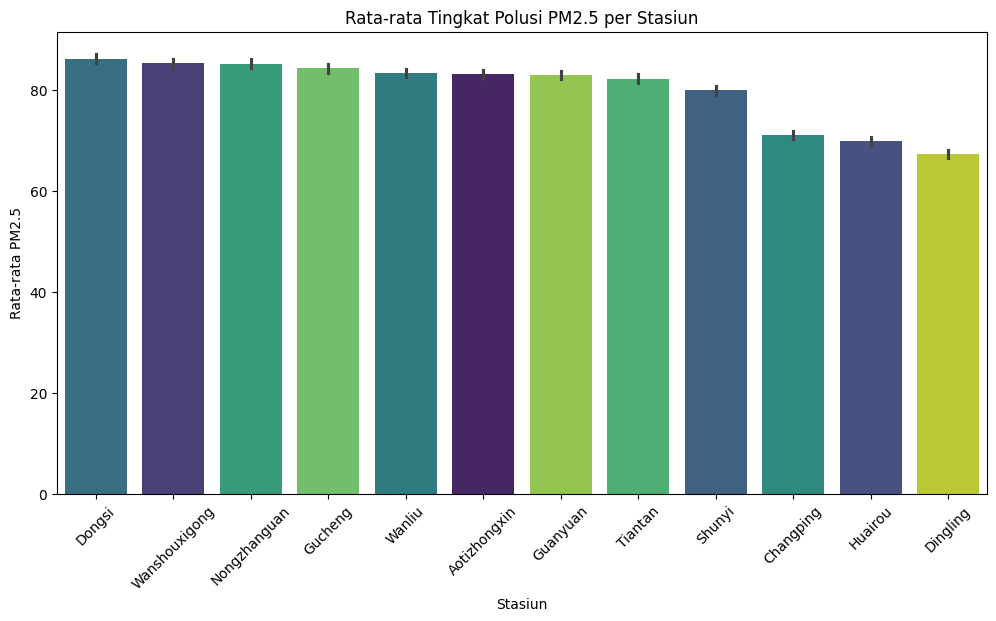

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=main_df, x='station', y='PM2.5', estimator='mean',
            order=main_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).index,
            palette='viridis', hue='station', legend=False)

plt.title('Rata-rata Tingkat Polusi PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(rotation=45)
plt.show()

**Insight Pertanyaan 1:**
- Terdapat pola musiman yang jelas pada tingkat polusi udara. Konsentrasi PM2.5 cenderung mencapai puncaknya pada musim dingin (bulan Desember-Februari), di mana rata-rata bulanan sering melebihi 100 µg/m³.
- Sebaliknya, kualitas udara cenderung membaik (kadar PM2.5 menurun) pada pertengahan tahun (musim panas/awal musim gugur sekitar bulan Agustus-September), dengan rata-rata terendah tercatat di bulan Agustus (sekitar 53 µg/m³).
- Secara keseluruhan tren tahunan fluktuatif, namun lonjakan polusi ekstrem terjadi secara berkala setiap akhir tahun.


**Insight Pertanyaan 2:**
- Stasiun **Dongsi** mencatat rata-rata tingkat polusi PM2.5 tertinggi dibandingkan stasiun lainnya, dengan nilai rata-rata sekitar **86.3 µg/m³**, diikuti oleh Nongzhanguan (85.3 µg/m³).
- Stasiun **Dingling** memiliki kualitas udara terbaik (tingkat polusi terendah) dengan rata-rata PM2.5 sekitar **67.4 µg/m³**.
- Perbedaan yang signifikan ini menunjukkan bahwa lokasi stasiun (mungkin terkait dengan kepadatan lalu lintas atau industri di sekitarnya) sangat mempengaruhi tingkat paparan polusi.

## Analisis Lanjutan (Opsional)

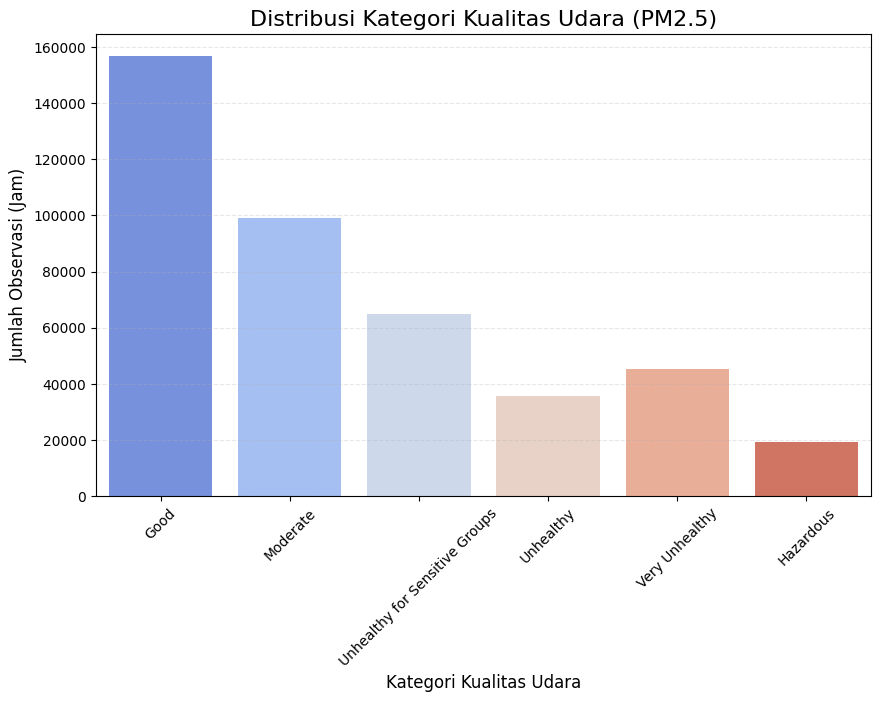

PM2.5_Category
Good                              37.267568
Moderate                          23.536010
Unhealthy for Sensitive Groups    15.418235
Very Unhealthy                    10.724675
Unhealthy                          8.498032
Hazardous                          4.555480
Name: proportion, dtype: float64


In [30]:
# Analisis Lanjutan: Clustering/Binning Kualitas Udara

# Fungsi untuk kategorisasi
def categorize_pm25(pm):
    if pm <= 35: return 'Good'
    elif pm <= 75: return 'Moderate'
    elif pm <= 115: return 'Unhealthy for Sensitive Groups'
    elif pm <= 150: return 'Unhealthy'
    elif pm <= 250: return 'Very Unhealthy'
    else: return 'Hazardous'

# Terapkan fungsi ke dataset
main_df['PM2.5_Category'] = main_df['PM2.5'].apply(categorize_pm25)

# Urutan kategori untuk visualisasi agar rapi
order_categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                   'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Visualisasi Distribusi Kategori
plt.figure(figsize=(10, 6))
sns.countplot(data=main_df, x='PM2.5_Category', order=order_categories,
              palette='coolwarm', hue='PM2.5_Category', legend=False)

plt.title('Distribusi Kategori Kualitas Udara (PM2.5)', fontsize=16)
plt.xlabel('Kategori Kualitas Udara', fontsize=12)
plt.ylabel('Jumlah Observasi (Jam)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Menampilkan persentase
print(main_df['PM2.5_Category'].value_counts(normalize=True) * 100)

**Penjelasan & Insight Analisis Lanjutan:**
- **Tujuan:** Teknik *Binning* ini dilakukan untuk menyederhanakan data numerik PM2.5 yang kompleks menjadi kategori kualitatif yang lebih mudah dipahami secara awam (Baik, Sedang, Tidak Sehat, dst.).

- **Insight:** Berdasarkan distribusi data, mayoritas waktu (sekitar **37.7%**) kualitas udara berada pada kategori **"Good"** (Baik). Namun, persentase kategori yang berbahaya juga cukup mengkhawatirkan. Gabungan kategori "Unhealthy" hingga "Hazardous" mencakup porsi yang signifikan dari total waktu observasi, menandakan bahwa penduduk sering terpapar udara yang tidak sehat.

## Conclusion

- **Conclusion Pertanyaan 1:** Tren kualitas udara menunjukkan **pola musiman yang kuat**. Kualitas udara memburuk secara signifikan pada **musim dingin (Desember-Februari)** dan membaik pada **musim panas (Agustus)**. Hal ini mengindikasikan perlunya tindakan mitigasi polusi yang lebih ketat khususnya menjelang dan selama musim dingin.

- **Conclusion Pertanyaan 2:** Terdapat variasi tingkat polusi antar lokasi. Stasiun **Dongsi** dan **Nongzhanguan** konsisten mencatat tingkat polusi tertinggi, menjadikannya area prioritas untuk intervensi lingkungan. Sebaliknya, stasiun **Dingling** cenderung memiliki udara yang lebih bersih.